<a href="https://colab.research.google.com/github/thooks630/DSCI_210_R_notebooks/blob/main/Revised_lecture_8_4_finding_and_visualizing_many_association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

* `dplyr` is fine if we want to use just one LHS item to predict a single RHS item, *but...*
 * What about multiple LHS items?? 
 * Best rule among all RHS items?? 

  The big idea: We need a better "search" algorithm!

### Automation with `arules`

We can automate the process with the 'arules' package.

In [76]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [77]:
library(arules)

In [78]:
library(dplyr)
library(tidyr)

In [ ]:
groceries <- read.csv("https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/Groceries.csv")
head(groceries)

### Formatting the Data

The data needs to be transformed into an object of class *transactions*.

In [80]:
groceries2 <- groceries %>% 
                mutate(id = row_number()) %>% 
                gather(key = "item", value = "val", frankfurter:bags) %>% 
                mutate(val = ifelse(val==0,FALSE,TRUE)) %>% 
                spread(key = item, value = val) %>% 
                select(-id)
groceries3 <- as(groceries2,"transactions")


### Exploring the Dataset
We can use the `summary` function to explore the data.

In [ ]:
summary(groceries3)

### Exploring the first five transactions
We can use the `inspect` function to explore the first five transactions.

In [ ]:
groceries3 %>% inspect() %>% head(5)

### Determining how often each item was purchased
We can use the `itemFrequency` function to determine what proportion of transactions included each item. Then, we can use the `itemFrequencyPlot` function to visualize the top 10 most frequently purchased items.

abrasive.cleaner          artif..sweetener            baby.cosmetics 
             0.0035587189              0.0032536858              0.0006100661 
                baby.food                      bags             baking.powder 
             0.0001016777              0.0004067107              0.0176919166 
         bathroom.cleaner                      beef                   berries 
             0.0027452974              0.0524656838              0.0332486019 
                beverages              bottled.beer             bottled.water 
             0.0260294865              0.0805287239              0.1105236401 
                   brandy               brown.bread                    butter 
             0.0041687850              0.0648703610              0.0554143366 
              butter.milk                  cake.bar                   candles 
             0.0279613625              0.0132180986              0.0089476360 
                    candy               canned.beer               canned.fish 
             0.0298932384              0.0776817489              0.0150482969 
             canned.fruit         canned.vegetables                  cat.food 
             0.0032536858              0.0107778343              0.0232841891 
                  cereals               chewing.gum                   chicken 
             0.0056939502              0.0210472801              0.0429079817 
                chocolate     chocolate.marshmallow              citrus.fruit 
             0.0496187087              0.0090493137              0.0827656329 
                  cleaner           cling.film.bags              cocoa.drinks 
             0.0050838841              0.0113879004              0.0022369090 
                   coffee            condensed.milk         cooking.chocolate 
             0.0580579563              0.0102694459              0.0025419420 
                 cookware                     cream              cream.cheese 
             0.0027452974              0.0013218099              0.0396542959 
                     curd               curd.cheese               decalcifier 
             0.0532791052              0.0050838841              0.0015251652 
              dental.care                   dessert                 detergent 
             0.0057956279              0.0371123538              0.0192170819 
             dish.cleaner                    dishes                  dog.food 
             0.0104728012              0.0175902389              0.0085409253 
            domestic.eggs  female.sanitary.products         finished.products 
             0.0634468734              0.0061006609              0.0065073716 
                     fish                     flour            flower..seeds. 
             0.0029486528              0.0173868836              0.0103711235 
   flower.soil.fertilizer               frankfurter            frozen.chicken 
             0.0019318760              0.0589730554              0.0006100661 
           frozen.dessert               frozen.fish             frozen.fruits 
             0.0107778343              0.0116929334              0.0012201322 
             frozen.meals    frozen.potato.products         frozen.vegetables 
             0.0283680732              0.0084392476              0.0480935435 
    fruit.vegetable.juice                    grapes                hair.spray 
             0.0722928317              0.0223690900              0.0011184545 
                      ham            hamburger.meat               hard.cheese 
             0.0260294865              0.0332486019              0.0245043213 
                    herbs                     honey    house.keeping.products 
             0.0162684291              0.0015251652              0.0083375699 
         hygiene.articles                 ice.cream            instant.coffee 
             0.0329435689              0.0250127097              0.0074224708 
    Instant.food.products                       jam        

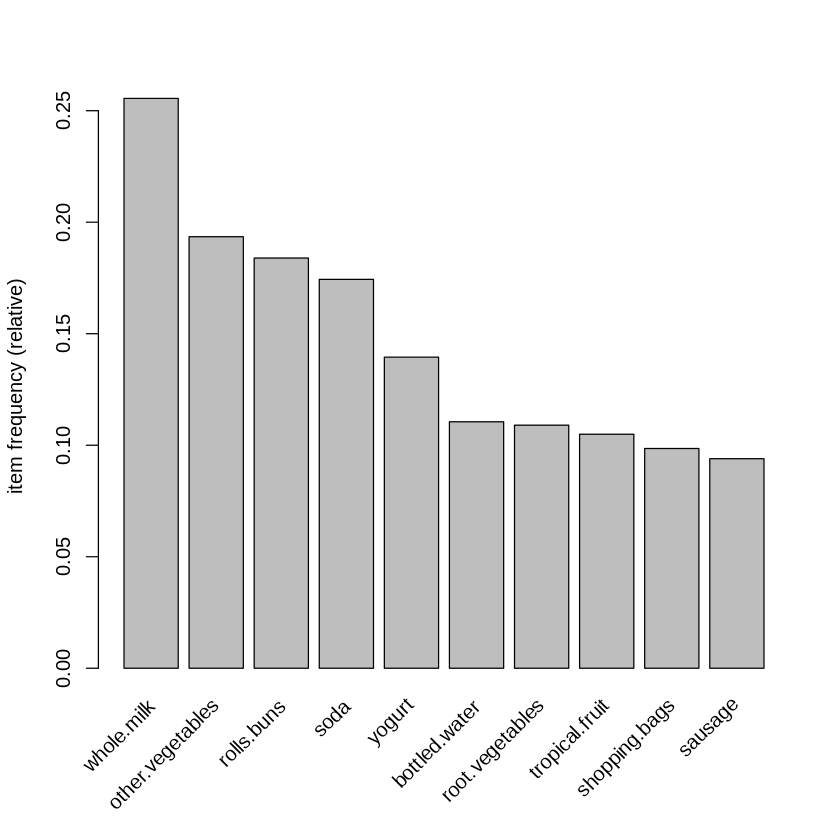

In [84]:
itemFrequency(groceries3)
itemFrequencyPlot(groceries3,topN=10)

### Using the apriori algorithm


* The `apriori` function can be used to find associations between the items in the dataset; we can use `parameter= ` to set min values.
* Note the default: `parameter = list(support = .1, confidence = .8, maxlen = 10)`
    * `minlen = 2` removes rules that contain less than two items
    * `maxlen = 2` sets one item on LHS, one on RHS
    *  **The "support" filter refers to the JOINT support!  *SUPPORT{LHS, RHS}***

In [ ]:
groc_rules <- apriori(groceries3, 
                      parameter = list(supp = 0.01,
                                       conf = 0.25,
                                       minlen = 2))
                    

### Evaluating the results

Use `summary()` to get an overview of the association rules.

In [ ]:
summary(groc_rules)

We can use `inspect()` to inspect the individual rules:

In [92]:
inspect(groc_rules[1:10]) 

     lhs                rhs                support    confidence coverage  
[1]  {hard.cheese}   => {whole.milk}       0.01006609 0.4107884  0.02450432
[2]  {butter.milk}   => {other.vegetables} 0.01037112 0.3709091  0.02796136
[3]  {butter.milk}   => {whole.milk}       0.01159126 0.4145455  0.02796136
[4]  {ham}           => {whole.milk}       0.01148958 0.4414062  0.02602949
[5]  {sliced.cheese} => {whole.milk}       0.01077783 0.4398340  0.02450432
[6]  {oil}           => {whole.milk}       0.01128622 0.4021739  0.02806304
[7]  {onions}        => {other.vegetables} 0.01423488 0.4590164  0.03101169
[8]  {onions}        => {whole.milk}       0.01209964 0.3901639  0.03101169
[9]  {berries}       => {yogurt}           0.01057448 0.3180428  0.03324860
[10] {berries}       => {other.vegetables} 0.01026945 0.3088685  0.03324860
     lift     count
[1]  1.607682  99  
[2]  1.916916 102  
[3]  1.622385 114  
[4]  1.727509 113  
[5]  1.721356 106  
[6]  1.573968 111  
[7]  2.372268 140  
[8] 

**Remember, the `support` column is the JOINT support of {LHS,RHS}**

### Sorting the association rules

We can use the `sort()` function to sort rules according to support, confidence, or lift.

In [99]:
sort(groc_rules, decreasing=TRUE, by="lift") %>% head(10) %>% inspect

     lhs                                   rhs                support   
[1]  {citrus.fruit, other.vegetables}   => {root.vegetables}  0.01037112
[2]  {other.vegetables, tropical.fruit} => {root.vegetables}  0.01230300
[3]  {beef}                             => {root.vegetables}  0.01738688
[4]  {citrus.fruit, root.vegetables}    => {other.vegetables} 0.01037112
[5]  {root.vegetables, tropical.fruit}  => {other.vegetables} 0.01230300
[6]  {other.vegetables, whole.milk}     => {root.vegetables}  0.02318251
[7]  {curd, whole.milk}                 => {yogurt}           0.01006609
[8]  {other.vegetables, yogurt}         => {root.vegetables}  0.01291307
[9]  {other.vegetables, yogurt}         => {tropical.fruit}   0.01230300
[10] {other.vegetables, rolls.buns}     => {root.vegetables}  0.01220132
     confidence coverage   lift     count
[1]  0.3591549  0.02887646 3.295045 102  
[2]  0.3427762  0.03589222 3.144780 121  
[3]  0.3313953  0.05246568 3.040367 171  
[4]  0.5862069  0.01769192 3.

### Pull out the rules with whole.milk

We can use the `subset()` function and the `%in%` operator to filter rules.

In [ ]:
groc_rules %>%
  subset(rhs %in% 'whole.milk') %>%
  sort(by = 'lift', decreasing = TRUE) %>% head(10) %>%
  inspect()


### A few more examples

#### Finding the 20 best rules for predicting whole milk, considering rules with at least 1% support.

In [103]:
milk_rules_1pct <-  subset(groc_rules, rhs %in% 'whole.milk' & support > .01) 
milk_rules_1pct %>% 
  sort(by = "lift") %>%
  head(20) %>% 
  inspect() 

     lhs                         rhs             support confidence   coverage     lift count
[1]  {curd,                                                                                  
      yogurt}                 => {whole.milk} 0.01006609  0.5823529 0.01728521 2.279125    99
[2]  {butter,                                                                                
      other.vegetables}       => {whole.milk} 0.01148958  0.5736041 0.02003050 2.244885   113
[3]  {root.vegetables,                                                                       
      tropical.fruit}         => {whole.milk} 0.01199797  0.5700483 0.02104728 2.230969   118
[4]  {root.vegetables,                                                                       
      yogurt}                 => {whole.milk} 0.01453991  0.5629921 0.02582613 2.203354   143
[5]  {domestic.eggs,                                                                         
      other.vegetables}       => {whole.milk} 0.01230300  0.

#### Finding the 10 best rules overall, among rules with at least 2% support. 

In [104]:
rules_10pct <-  subset(groc_rules, support > .02) 
rules_10pct %>% 
  sort(by="lift") %>%
  head(10) %>% 
  inspect()

     lhs                               rhs                support    confidence
[1]  {other.vegetables, whole.milk} => {root.vegetables}  0.02318251 0.3097826 
[2]  {pip.fruit}                    => {tropical.fruit}   0.02043721 0.2701613 
[3]  {root.vegetables, whole.milk}  => {other.vegetables} 0.02318251 0.4740125 
[4]  {root.vegetables}              => {other.vegetables} 0.04738180 0.4347015 
[5]  {other.vegetables, whole.milk} => {yogurt}           0.02226741 0.2975543 
[6]  {whipped.sour.cream}           => {other.vegetables} 0.02887646 0.4028369 
[7]  {whipped.sour.cream}           => {yogurt}           0.02074225 0.2893617 
[8]  {whole.milk, yogurt}           => {other.vegetables} 0.02226741 0.3974592 
[9]  {other.vegetables, yogurt}     => {whole.milk}       0.02226741 0.5128806 
[10] {tropical.fruit}               => {yogurt}           0.02928317 0.2790698 
     coverage   lift     count
[1]  0.07483477 2.842082 228  
[2]  0.07564820 2.574648 201  
[3]  0.04890696 2.449770 22

### Visualizing association rules


The `arulesViz` package can be used to visualize and interact with individual rules. 

In [ ]:
install.packages('arulesViz')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘ca’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [ ]:
library(arulesViz)

#### Scatter plot with `color = lift`

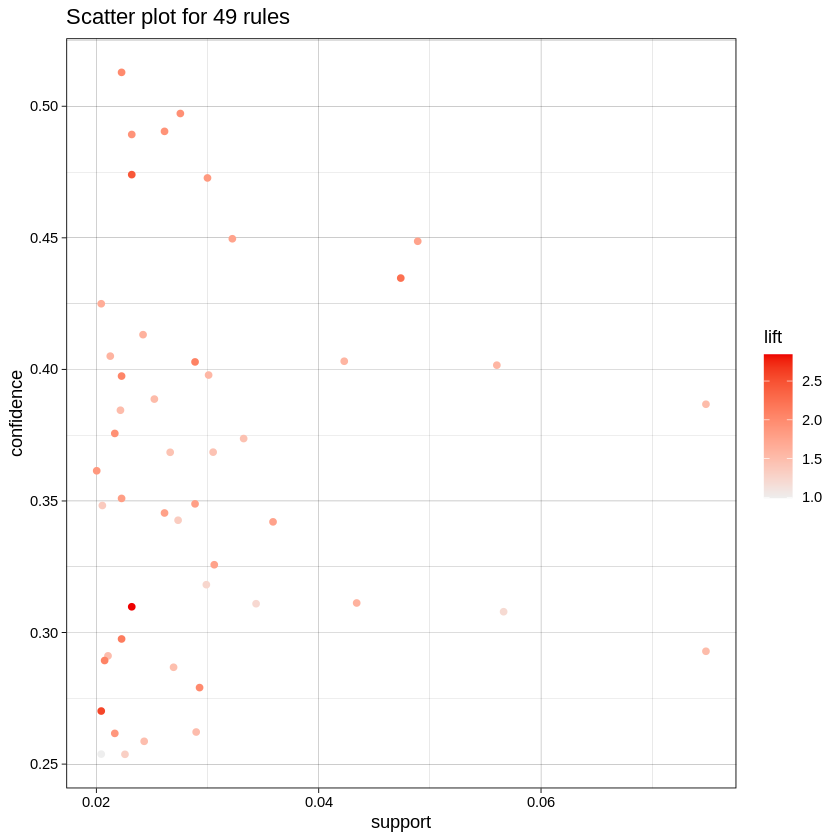

In [ ]:
plot(rules_10pct)

#### Rearranged scatter plot with `color = confidence`

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



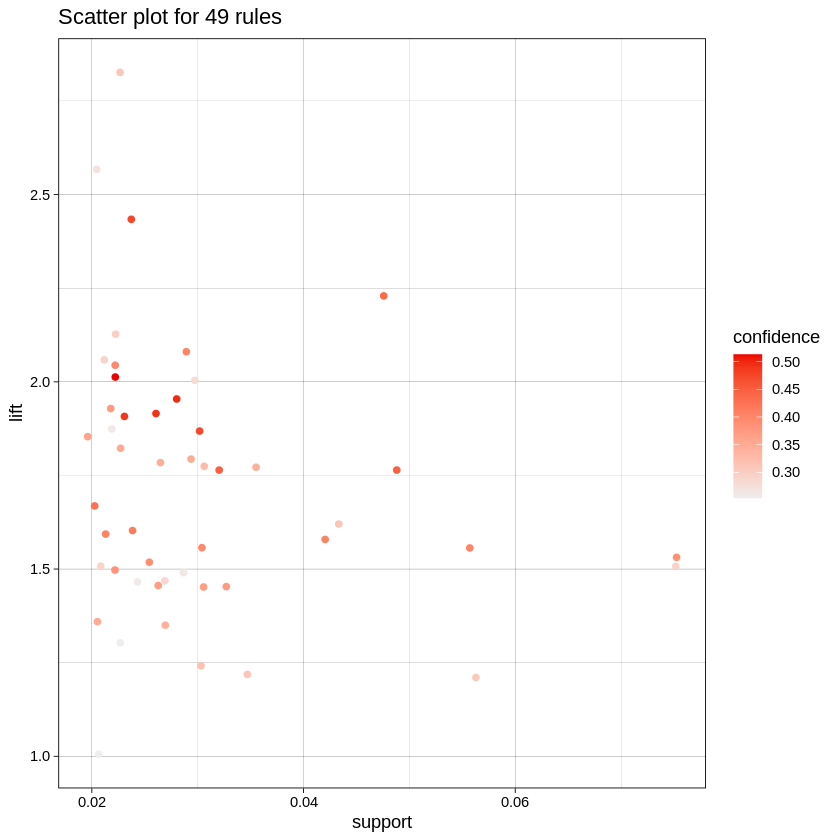

In [ ]:
#change the visual encoding:
plot(rules_10pct, measure = c('support','lift'), shading = 'confidence')

#### Plotting rules as a graph

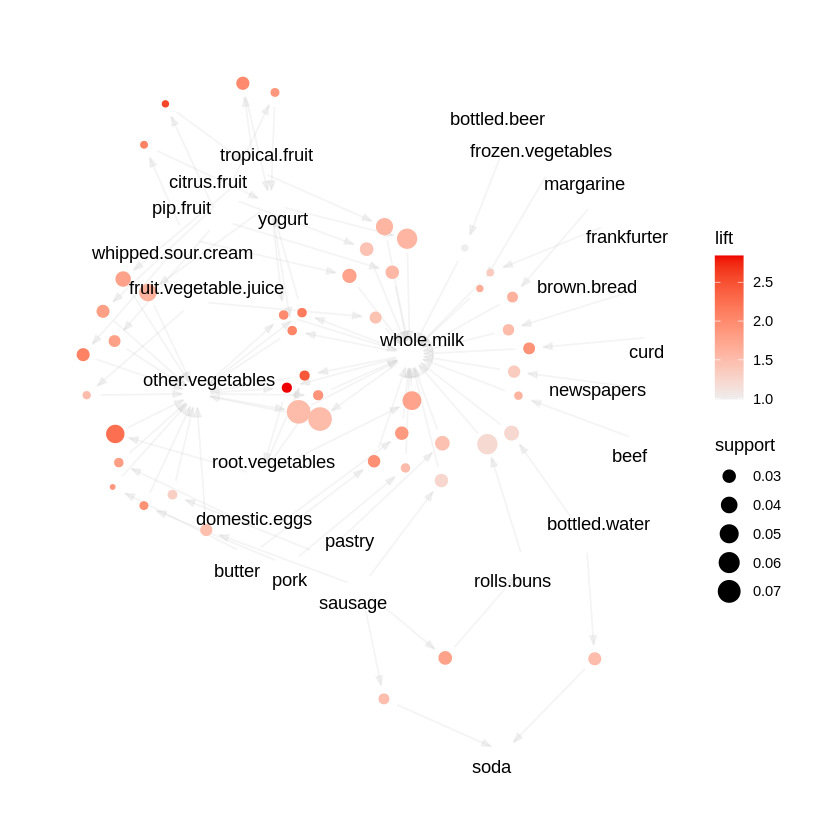

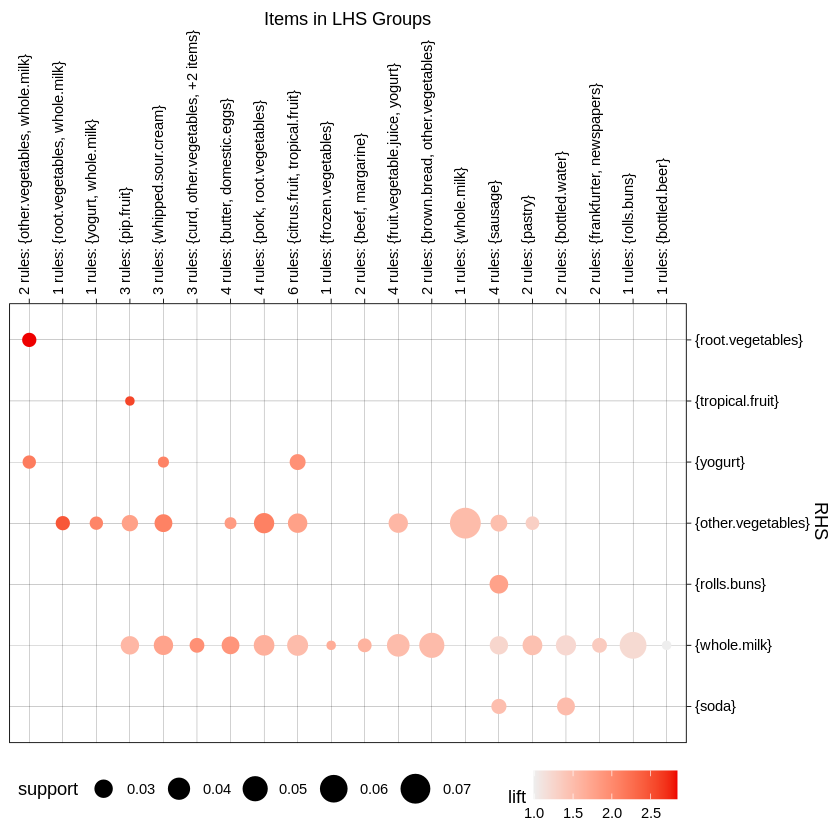

In [ ]:
plot(rules_10pct, method = "graph")
plot(rules_10pct, method = "grouped")

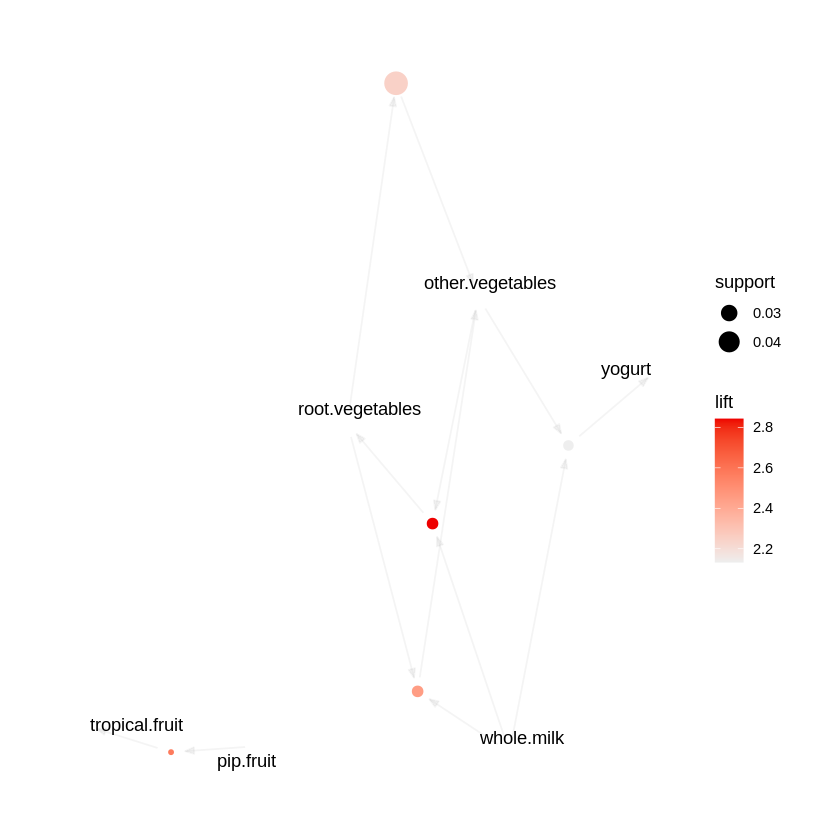

In [ ]:
rules_10pct %>% 
  sort(by="lift") %>%
  head(5) %>% 
  plot(method = "graph")